In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_cars = pd.read_csv('../dataset/USA_cars_datasets.csv')

df_cars.head()

df_cars_eda = df_cars.copy()

In [193]:
df_cars_eda['brand'].unique()

array(['toyota', 'ford', 'dodge', 'chevrolet', 'gmc', 'chrysler', 'kia',
       'buick', 'infiniti', 'mercedes-benz', 'jeep', 'bmw', 'cadillac',
       'hyundai', 'mazda', 'honda', 'heartland', 'jaguar', 'acura',
       'harley-davidson', 'audi', 'lincoln', 'lexus', 'nissan', 'land',
       'maserati', 'peterbilt', 'ram'], dtype=object)

In [194]:
df_cars_eda['title_status'].unique()

array(['clean vehicle', 'salvage insurance'], dtype=object)

In [195]:
df_cars_eda['color'].unique()

array(['black', 'silver', 'blue', 'red', 'white', 'gray', 'orange',
       'brown', 'no_color', 'gold', 'charcoal', 'turquoise', 'beige',
       'green', 'dark blue', 'maroon', 'phantom black', 'yellow',
       'color:', 'light blue', 'toreador red', 'bright white clearcoat',
       'billet silver metallic clearcoat', 'black clearcoat',
       'jazz blue pearlcoat', 'purple',
       'ruby red metallic tinted clearcoat', 'triple yellow tri-coat',
       'competition orange', 'off-white', 'shadow black',
       'magnetic metallic', 'ingot silver metallic', 'ruby red',
       'royal crimson metallic tinted clearcoat', 'kona blue metallic',
       'oxford white', 'lightning blue', 'ingot silver',
       'white platinum tri-coat metallic', 'guard',
       'tuxedo black metallic', 'tan', 'burgundy', 'super black',
       'cayenne red', 'morningsky blue', 'pearl white', 'glacier white'],
      dtype=object)

In [196]:
df_cars.drop(columns=['Unnamed: 0', 'vin','lot', 'condition'], inplace=True)
df_cars_eda.drop(columns=['Unnamed: 0', 'vin','lot', 'condition'], inplace=True)

In [197]:
df_cars_eda.isnull().sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
state           0
country         0
dtype: int64

<Axes: ylabel='mileage'>

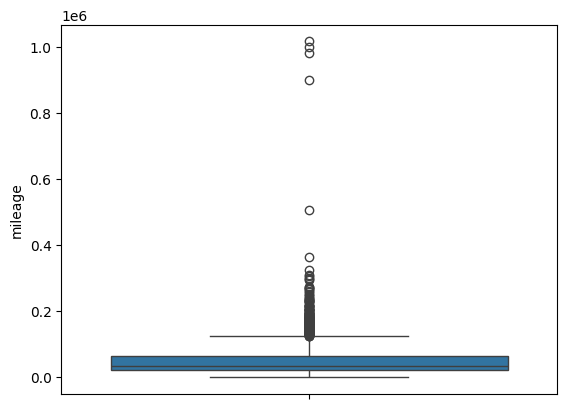

In [198]:
sns.boxplot(data=df_cars_eda, y='mileage')

<Axes: ylabel='price'>

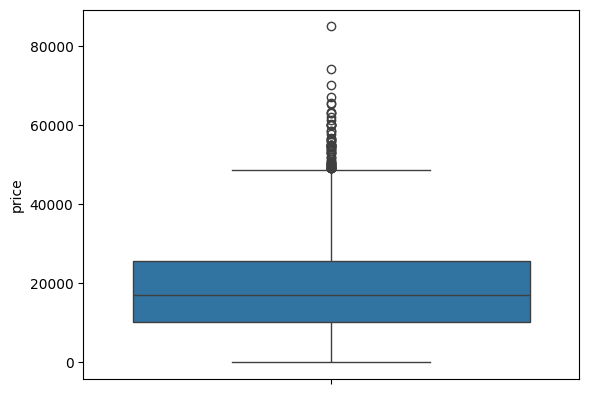

In [199]:
sns.boxplot(data=df_cars_eda, y='price')

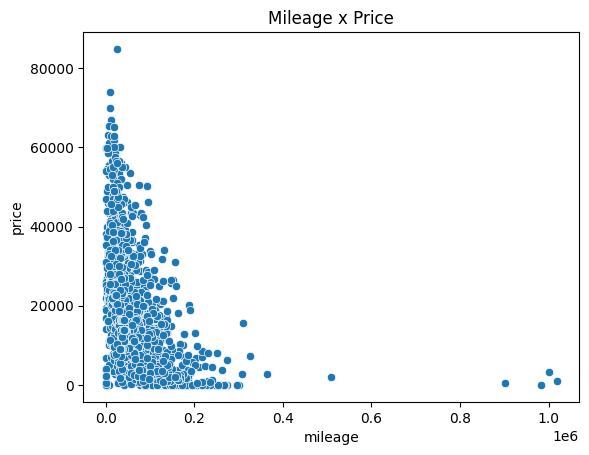

In [200]:
sns.scatterplot(data=df_cars_eda, x='mileage', y='price')
plt.title('Mileage x Price')
plt.show()

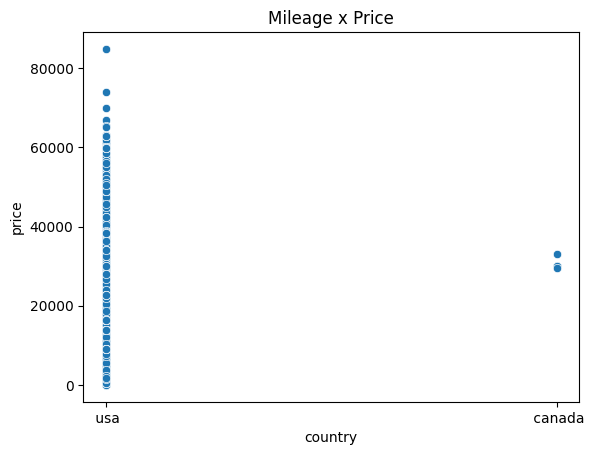

In [201]:
sns.scatterplot(data=df_cars_eda, x='country', y='price')
plt.title('Mileage x Price')
plt.show()

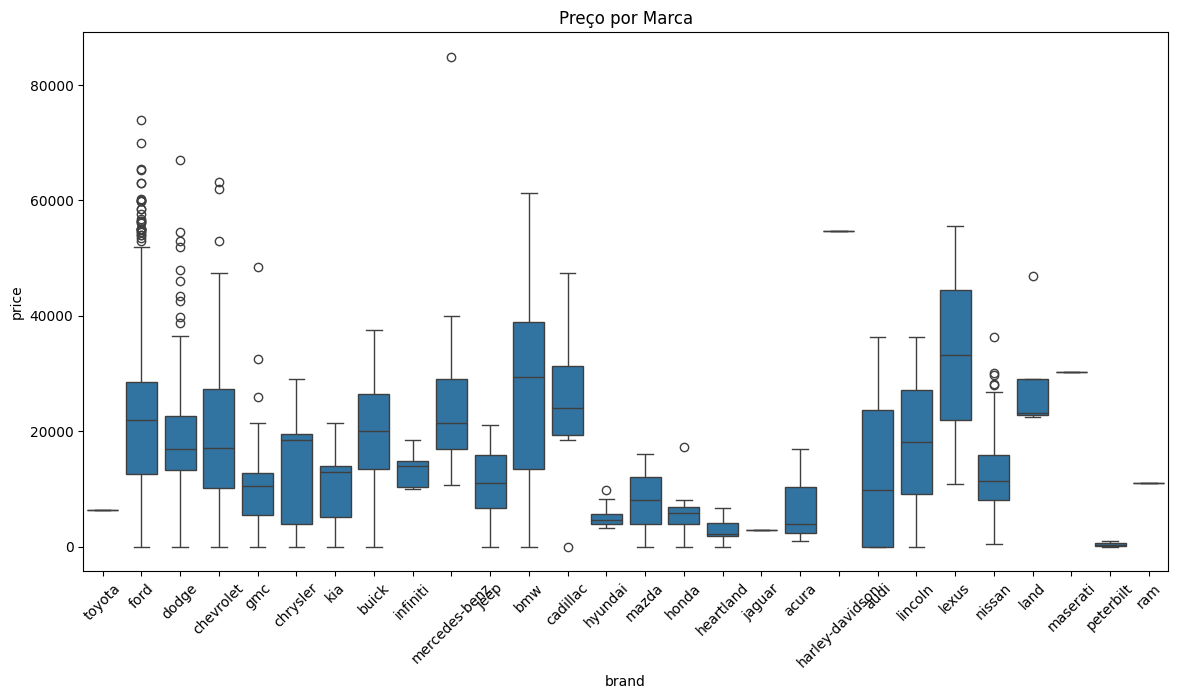

In [202]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_cars_eda, x='brand', y='price')
plt.title('Preço por Marca')
plt.xticks(rotation=45)
plt.show()



In [203]:
df_cars_eda[df_cars_eda['price'] > 80000][['brand', 'model', 'price', 'year']]


,brand,model,price,year
502,mercedes-benz,sl-class,84900,2017


In [204]:
df_cars_eda.describe()


,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


<Axes: >

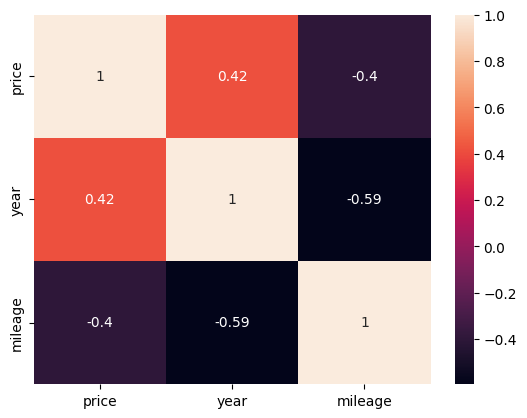

In [205]:
sns.heatmap(df_cars_eda.corr(numeric_only=True), annot=True)

In [206]:
top_brands = df_cars_eda['brand'].value_counts().nlargest(10).index
df_cars_eda['brand_grouped'] = df_cars_eda['brand'].apply(lambda x: x if x in top_brands else 'other')


top_models = df_cars_eda['model'].value_counts().nlargest(10).index
df_cars_eda['model_grouped'] = df_cars_eda['model'].apply(lambda x: x if x in top_models else 'other')

top_states = df_cars_eda['state'].value_counts().nlargest(10).index
df_cars_eda['state_grouped'] = df_cars_eda['state'].apply(lambda x: x if x in top_states else 'other')

df_cars_eda = pd.get_dummies(df_cars_eda, columns=['brand_grouped', 'model_grouped', 'state_grouped', ], drop_first=True)

df_cars_eda = pd.get_dummies(df_cars_eda, columns=['title_status', 'country'], drop_first=True)

df_cars_eda.drop(columns=['brand', 'model', 'state', 'color'], inplace=True)




In [207]:
df_cars_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           2499 non-null   int64  
 1   year                            2499 non-null   int64  
 2   mileage                         2499 non-null   float64
 3   brand_grouped_buick             2499 non-null   bool   
 4   brand_grouped_chevrolet         2499 non-null   bool   
 5   brand_grouped_chrysler          2499 non-null   bool   
 6   brand_grouped_dodge             2499 non-null   bool   
 7   brand_grouped_ford              2499 non-null   bool   
 8   brand_grouped_gmc               2499 non-null   bool   
 9   brand_grouped_hyundai           2499 non-null   bool   
 10  brand_grouped_jeep              2499 non-null   bool   
 11  brand_grouped_nissan            2499 non-null   bool   
 12  brand_grouped_other             24

<Axes: >

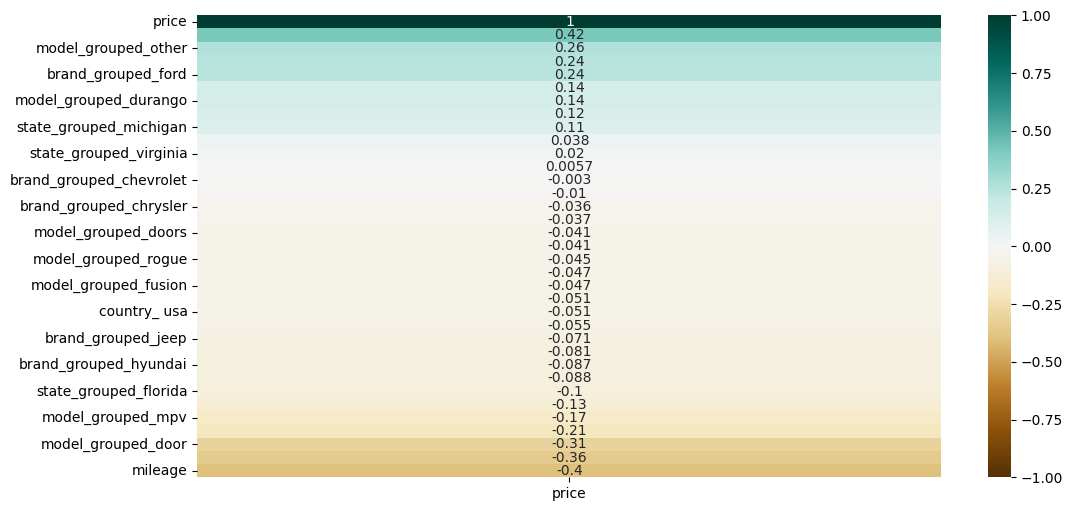

In [209]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_cars_eda.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

<Axes: >

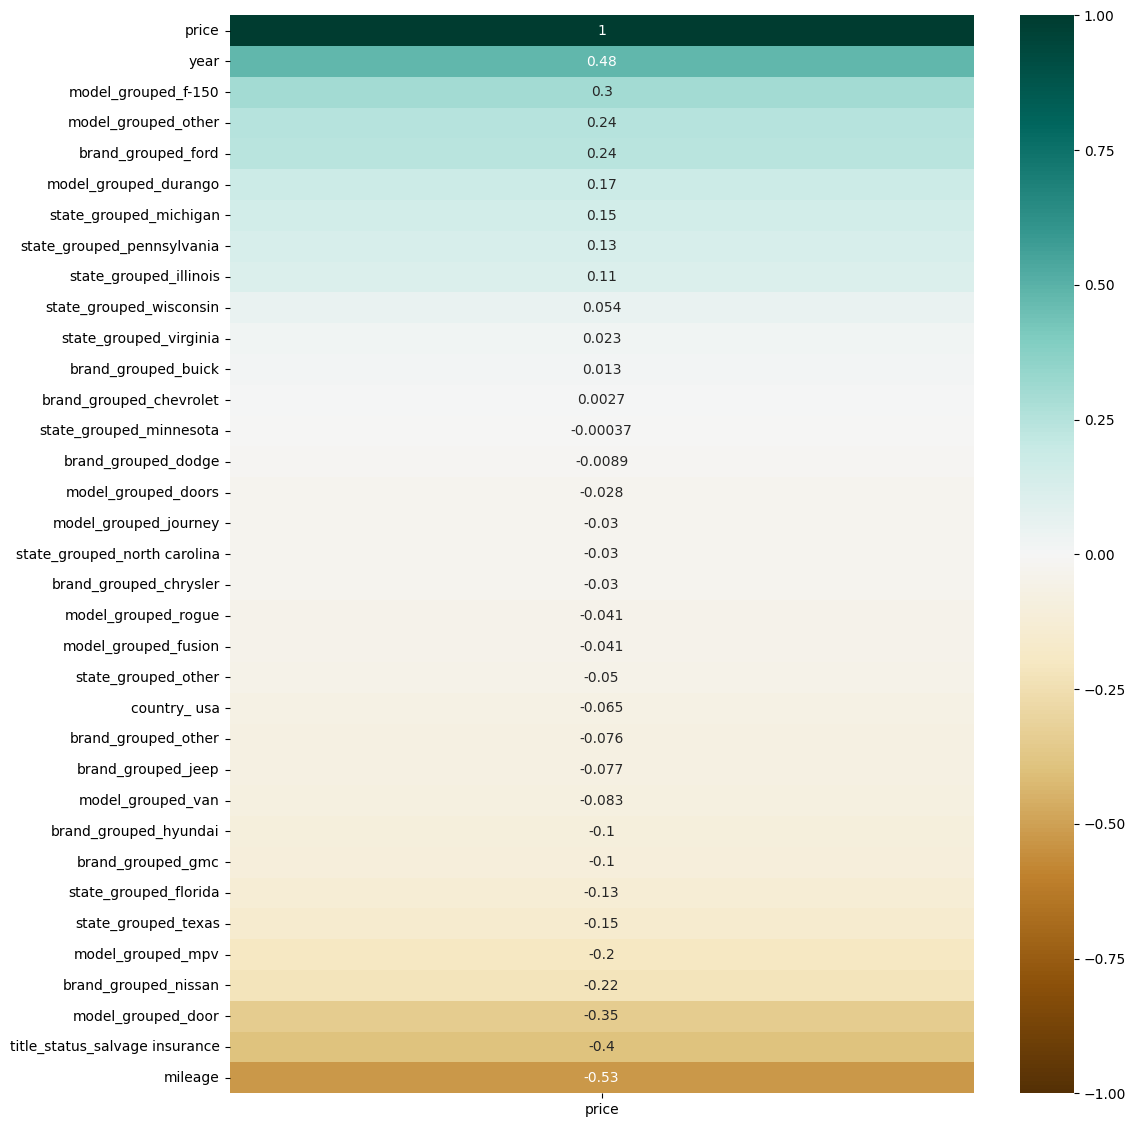

In [211]:
plt.figure(figsize=(12, 14))
sns.heatmap(df_cars_eda.corr('spearman')[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')